Original Data Head:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  




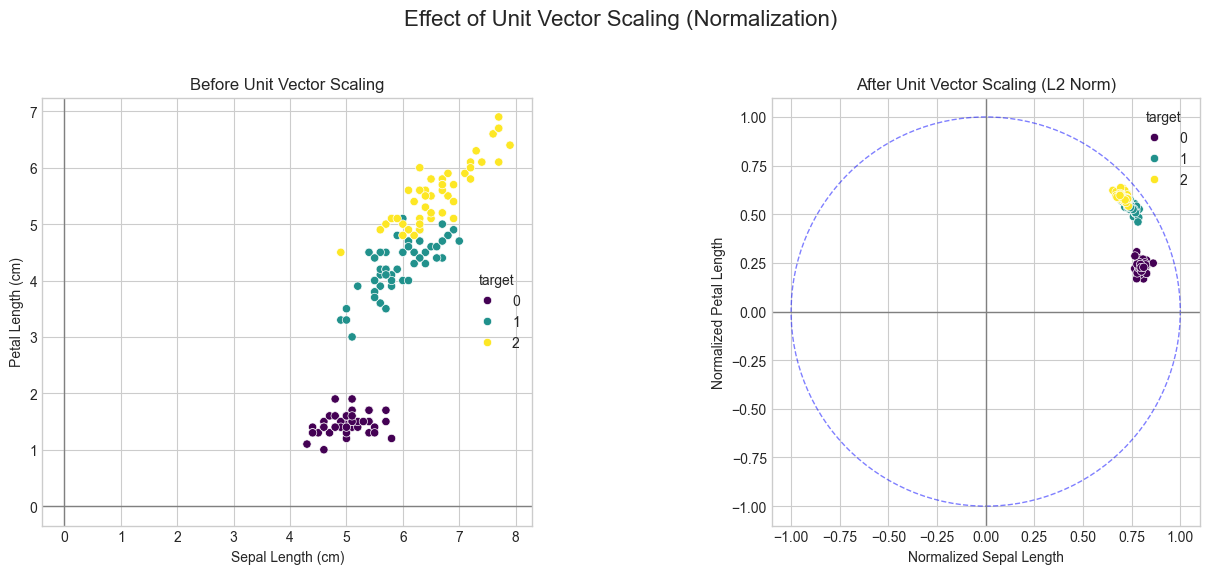


DataFrame with Normalized Columns:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  sepal length (cm)_normalized  sepal width (cm)_normalized  \
0       0                      0.803773                     0.551609   
1       0                      0.828133                     0.507020   
2       0                      0.805333                     0.548312   
3       0                      0.800030                     0.539151   
4       0                      0.790965                     0.569495   

   petal length (cm)_normalized  petal width (cm)_normal

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import Normalizer
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns

# --- When to Use Unit Vector Scaling (Normalizer) ---
#
# Unit Vector Scaling, or Normalizer, scales each sample (i.e., each row of the data)
# independently to have a unit norm (a length of 1).
#
# Use Cases:
# - Text Classification or Clustering: When dealing with text data represented as word counts
#   or TF-IDF vectors, normalization is often used. It helps in comparing documents of
#   different lengths by focusing on the orientation (i.e., the relative frequencies of words)
#   rather than the magnitude (i.e., the absolute word counts).
# - High-Dimensional, Sparse Data: It's particularly useful for datasets with many features
#   and many zero values, where the magnitude of non-zero features might not be as important
#   as their relationships.
# - Algorithms that measure similarity based on angle: Algorithms like Cosine Similarity
#   work on the angle between vectors, not their magnitude. Normalizing the vectors to unit
#   length makes the dot product directly equivalent to the cosine similarity.
#
# Requirements:
# - The technique works on a row-by-row basis, so it doesn't consider the distribution
#   of features across the entire dataset.
# - It is applied to numerical data.
# - It does not handle missing values; they must be imputed beforehand.

# 1. FIND AND LOAD A RELEVANT DATASET FROM SCIKIT-LEARN
# The Iris dataset is a classic and simple dataset, suitable for demonstrating scaling techniques.
# It contains 4 numerical features representing measurements of iris flowers.
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target

print("Original Data Head:")
print(iris_df.head())
print("\n" + "="*50 + "\n")

# 2. SELECT FEATURES TO WORK WITH
# We will apply the normalization to all four numerical features.
features_to_normalize = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
data_to_normalize = iris_df[features_to_normalize]

# 3. APPLY THE UNIT VECTOR SCALING (NORMALIZER)
# We will use the L2 norm, which means each row vector will be scaled such that the
# sum of the squares of its elements is 1.
normalizer = Normalizer(norm='l2')

# The fit_transform method fits the scaler to the data and then transforms it.
# For Normalizer, the 'fit' part doesn't learn anything from the data distribution,
# it just prepares the transformer.
normalized_data = normalizer.fit_transform(data_to_normalize)

# 4. SHOW THE RESULT
# Create new columns in the original DataFrame to store the transformed data.
# This makes it easy to compare the original and normalized values.
for i, col in enumerate(features_to_normalize):
    iris_df[f'{col}_normalized'] = normalized_data[:, i]

# 5. CREATE A BEFORE-AND-AFTER VISUALIZATION
# A scatter plot is a good way to visualize the effect of normalization on 2D or 3D data.
# We'll compare 'sepal length' and 'petal length' before and after.
# The "after" plot will show the data points projected onto a circle (or sphere in higher dimensions)
# of radius 1.

plt.style.use('seaborn-v0_8-whitegrid')
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14, 6))

# Before Normalization
sns.scatterplot(data=iris_df, x='sepal length (cm)', y='petal length (cm)', hue='target', palette='viridis', ax=ax1)
ax1.set_title('Before Unit Vector Scaling')
ax1.set_xlabel('Sepal Length (cm)')
ax1.set_ylabel('Petal Length (cm)')
ax1.set_aspect('equal', adjustable='box') # Ensure aspect ratio is equal for a fair comparison
ax1.axhline(0, color='grey', lw=1)
ax1.axvline(0, color='grey', lw=1)


# After Normalization
sns.scatterplot(data=iris_df, x='sepal length (cm)_normalized', y='petal length (cm)_normalized', hue='target', palette='viridis', ax=ax2)
ax2.set_title('After Unit Vector Scaling (L2 Norm)')
ax2.set_xlabel('Normalized Sepal Length')
ax2.set_ylabel('Normalized Petal Length')
ax2.set_aspect('equal', adjustable='box') # Ensure aspect ratio is equal
ax2.axhline(0, color='grey', lw=1)
ax2.axvline(0, color='grey', lw=1)

# Add a circle of radius 1 to the "after" plot to show the effect of L2 normalization
circle = plt.Circle((0, 0), 1, color='blue', fill=False, linestyle='--', alpha=0.5)
ax2.add_artist(circle)
ax2.set_xlim(-1.1, 1.1)
ax2.set_ylim(-1.1, 1.1)


plt.suptitle('Effect of Unit Vector Scaling (Normalization)', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# 6. PRINT THE HEAD OF THE RESULTING DATAFRAME
# Display the first few rows to show the original and newly created normalized columns.
print("\nDataFrame with Normalized Columns:")
print(iris_df.head())

# You can verify the L2 norm for the first row:
first_row_normalized = iris_df.loc[0, ['sepal length (cm)_normalized', 'sepal width (cm)_normalized', 'petal length (cm)_normalized', 'petal width (cm)_normalized']]
l2_norm = np.sqrt(np.sum(first_row_normalized**2))
print(f"\nL2 Norm of the first normalized row: {l2_norm:.2f}")
print("(It should be very close to 1.0)")
